### <b>Table of Content</b>

0. Import functions

1. Load data

2. 

2. Create Bollinger Bands

### <b>0. Import functions</b>

In [1]:
import sys
import os
from pathlib import Path

from utils.load import load_dataframes
from utils.transform import convert_vol_to_float, add_moving_average, add_seasonal_components, add_datetime_features,\
                            normalize_scale
from utils.plot import plot_histograms
from utils.stats_functions import run_chi_tests

import warnings
warnings.simplefilter('ignore', UserWarning)

### <b>1. Load data</b>

In [2]:
# Details of the source file in G Drive
base_url = 'https://drive.google.com/file/d/'
file_id = '1MiunF_O8eNWIcfaOA4PVm668RN7FgLNA0a6U4LWf5Bk'
file_url = f'{base_url}{file_id}'
file_name = '2020Q1Q2Q3Q4-2021Q1.xlsx'

# Manually define sheet names as xlsx files have a 31-character limitation on sheet names.
full_sheet_names = [
    'Russia - Sberbank Rossii PAO (SBER)',
    'Turkey - Koc Holding AS (KCHOL)',
    'Egypt - Medinet Nasr Housing (MNHD)',
    'Brazil - Minerva SA/Brazil (BEEF3)',
    'Argentina - Pampa Energia SA (PAMP)',
    'Colombia - Cementos Argos SA (CCB)',
    'South Africa - Impala Platinum Holdings Ltd (IMPJ)',
    'South Korea - Dongkuk Steel Mill Co Ltd (001230)'
]

# Details of local directories
root_dir = sys.path[0]
download_dir = Path(root_dir) / 'data'
file_path = download_dir / file_name

if os.path.exists(file_path):
    print(f'File {file_name} already exists in {download_dir}.')
else:
    if os.getcwd() != download_dir:
        os.chdir(download_dir)
    print(f'File {file_name} is not found in {download_dir}.')
    !gdown 1MiunF_O8eNWIcfaOA4PVm668RN7FgLNA0a6U4LWf5Bk

if os.getcwd() != root_dir:
    os.chdir(root_dir)

File 2020Q1Q2Q3Q4-2021Q1.xlsx already exists in d:\OneDrive\GitHub\Apziva\FAxAtx2ZjFTGstEu\data.


### <b>2. EDA and evaluate feature importance?</b>

In [3]:
data_dfs = load_dataframes(file_path, full_sheet_names)
print(f'{len(data_dfs)} DataFrames loaded with the following sheet names:\n')
for sheet_name in full_sheet_names:
    print(sheet_name)

print('\n\nBasic info of the first DateFrame:\n')
print(data_dfs[full_sheet_names[0]].info())

print('\n\nTail of the first DataFrame:')
data_dfs[full_sheet_names[0]].tail()

8 DataFrames loaded with the following sheet names:

Russia - Sberbank Rossii PAO (SBER)
Turkey - Koc Holding AS (KCHOL)
Egypt - Medinet Nasr Housing (MNHD)
Brazil - Minerva SA/Brazil (BEEF3)
Argentina - Pampa Energia SA (PAMP)
Colombia - Cementos Argos SA (CCB)
South Africa - Impala Platinum Holdings Ltd (IMPJ)
South Korea - Dongkuk Steel Mill Co Ltd (001230)


Basic info of the first DateFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      311 non-null    datetime64[ns]
 1   Price     311 non-null    float64       
 2   Open      311 non-null    float64       
 3   High      311 non-null    float64       
 4   Low       311 non-null    float64       
 5   Vol.      311 non-null    object        
 6   Change %  311 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 17.1+ KB
None


Ta

,Date,Price,Open,High,Low,Vol.,Change %
306,2020-01-10,258.19,257.86,259.25,256.88,18.85M,0.0008
307,2020-01-09,257.99,259.40,261.76,257.01,38.33M,-0.0045
308,2020-01-08,259.15,253.57,259.15,253.03,40.82M,0.0207
309,2020-01-06,253.90,254.75,254.84,251.40,22.35M,-0.0043
310,2020-01-03,255.00,255.99,258.19,253.70,35.85M,0.0010


some description of the data set to be added.

#### the part below to be updated later

In [4]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(8,6))
# corr_df = pd.concat([
#     y_train_1,
#     X_train_1],
#     axis=1).corr()
# sns.heatmap(corr_df)
# plt.xticks(rotation = -45)
# plt.tight_layout()


# from pylab import rcParams
# rcParams['figure.figsize'] = 12, 8

# print('Plot seasonal componets of train_df_1:')
# train_df_1 = add_seasonal_components(df=train_df_1, frequency='D', column='Close', add_to_df=True, plot=True)
# test_df_1 = add_seasonal_components(df=test_df_1, frequency='D', column='Close', add_to_df=True, plot=False)


# rcParams['figure.figsize'] = 12, 2
# from statsmodels.graphics.tsaplots import plot_pacf
# plot_pacf(train_df_1['Close'], method='ywm');


# plot_histograms(data=normalized_train_df_1,
#                 target='Close', target_figsize=(2,2),
#                 dependent_layout=(2,9), dependent_figsize=(12, 4),
#                 include_boxplots=True)


# results_dfs = run_chi_tests(normalized_train_df_1, target='Close', significance_level=0.05,
#                             plot_title=None, plot_title_y=None,
#                             plot_row=3, plot_col=6, figsize=None, plot=False,
#                             rotate_x_label_col=[], rotate_angle=None,
#                             h_pad=3, print_result_df=False,
#                             independence_test=True,
#                             goodness_of_fit_test=False)

# print('''
# If the null hypothesis is not rejected at the significance level of 0.05,
# the Variable and the target (i.e. Close) are independent of each other.
# ''')
# results_dfs[0]


# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(8,6))
# sns.heatmap(normalized_train_df_1.corr())
# plt.xticks(rotation = -45)
# plt.tight_layout()

### <b>3. feature selection?</b>

If you are training a regression model, get trading decisions based on the bollinger bands created based on the actual price against the predicted price.

If you want to use the price 7 days ago, use 7-day rolling average instead, rather than the actual price 7 days ago.

possible features to use:
- on average has the price gone up or donw in the last week?
- what is the change over the last 2 days (prices on day-1 vs. day-2), last 3 days, 4 days, or a week?
- this is to get model learns/captures the price movement in the recent past.

Forget about the balance when trading and simply take trading action based on the predicted decision even if the balance would go negative. If you care too much about having fewer 'hold' decisions, you will essentially optimize for trading everyday (i.e. without hold decisions) rather than optimizing for making more profit.

# Don't think too much and keep it simple. There's no right answer as you can define the solution in so many different ways.

* if the predicted price is lower than the lower bound—> buy
* if the predicted price is higher than the upper bound—> sell
* if within the Bollinger band, hold.

adjust parameters of the bollinger bands so that there will be as few Hold decision as possible.

After labeling, add_data_from_past and use them as training features to train a classification model.

1. 'Vol.' and 'Change %' are not relevant based on correlation coefficeints with the target column 'Price', hence drop them.
2. Only the previous date's price is highly correlated with today's price based on auto correlation, thus don't look too further in the past.

In [5]:
df = data_dfs[full_sheet_names[0]].set_index('Date').sort_index().drop(['Vol.', 'Change %'], axis=1)
original_index = df.index
df.head(), df.tail()

(             Price    Open    High     Low
 Date                                      
 2020-01-03  255.00  255.99  258.19  253.70
 2020-01-06  253.90  254.75  254.84  251.40
 2020-01-08  259.15  253.57  259.15  253.03
 2020-01-09  257.99  259.40  261.76  257.01
 2020-01-10  258.19  257.86  259.25  256.88,
              Price    Open    High     Low
 Date                                      
 2021-03-25  286.66  286.50  287.03  283.85
 2021-03-26  291.22  288.63  292.75  288.32
 2021-03-29  293.30  289.72  294.09  289.26
 2021-03-30  293.25  294.86  295.72  291.50
 2021-03-31  291.02  294.00  294.42  290.26)

get training features

In [6]:
import pandas as pd

price_previous_day = df[:-1]
price_previous_day.index = df.index[1:]
price_previous_day = price_previous_day.rename(columns={col: f'{col} (Day-1)' for col in df.columns})

moving_average_dfs = []
max_high_dfs = []
min_low_dfs = []
for num_day in range(2,8):
    moving_average_df = df['Price'].rolling(window=num_day).mean()[ (num_day-1) : -1]
    moving_average_df.index = df.index[num_day : ]
    moving_average_df.name = f'{num_day} Day Moving Average (Day-1)'
    moving_average_dfs.append(moving_average_df)

    max_high_df = df['High'].rolling(window=num_day).max()[ (num_day-1) : -1]
    max_high_df.index = df.index[num_day : ]
    max_high_df.name = f'{num_day} Day Max High (Day-1)'
    max_high_dfs.append(max_high_df)

    min_low_df = df['Low'].rolling(window=num_day).min()[ (num_day-1) : -1]
    min_low_df.index = df.index[num_day : ]
    min_low_df.name = f'{num_day} Day Min Low (Day-1)'
    min_low_dfs.append(min_low_df)

concat_df = pd.concat(
    [df, price_previous_day]
    + moving_average_dfs
    + max_high_dfs
    + min_low_dfs,
    axis=1).dropna()

X = concat_df.drop(['Price', 'Open', 'High', 'Low'], axis=1)
y = concat_df['Price']

train-test split

In [7]:
X_train = X[X.index.year == 2020]
X_test = X[X.index.year == 2021]
y_train = y[y.index.year == 2020]
y_test = y[y.index.year == 2021]

train a SARIMAX model

In [8]:
# https://medium.datadriveninvestor.com/time-series-prediction-using-sarimax-a6604f258c56
from pmdarima.arima import auto_arima
step_wise=auto_arima(y_train, 
                    exogenous= X_train,
                    start_p=1, max_p=7, 
                    start_q=1, max_q=7, 
                    d=1, max_d=7,
                    trace=True, 
                    error_action='ignore', 
                    suppress_warnings=True, 
                    stepwise=True)
step_wise.summary()

# https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1464.557, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1461.760, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1463.283, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1463.233, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1459.800, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.522 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  243
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -728.900
Date:                Fri, 30 Jun 2023   AIC                           1459.800
Time:                        21:50:08   BIC                           1463.289
Sample:                             0   HQIC                          1461.206
                                - 243                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        24.1937      1.313     18.428      0.000      21.620      26.767
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):               134.83
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  243
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -700.893
Date:                Fri, 30 Jun 2023   AIC                           1447.786
Time:                        21:50:10   BIC                           1528.031
Sample:                             0   HQIC                          1480.112
                                - 243                                         
Covariance Type:                  opg                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Price (Day-1)                    0.0346      0.173      0.199      0.842      -0.305       0.374
Open (Day-1)                    -0.2050      0.154     -1.328      0.184     

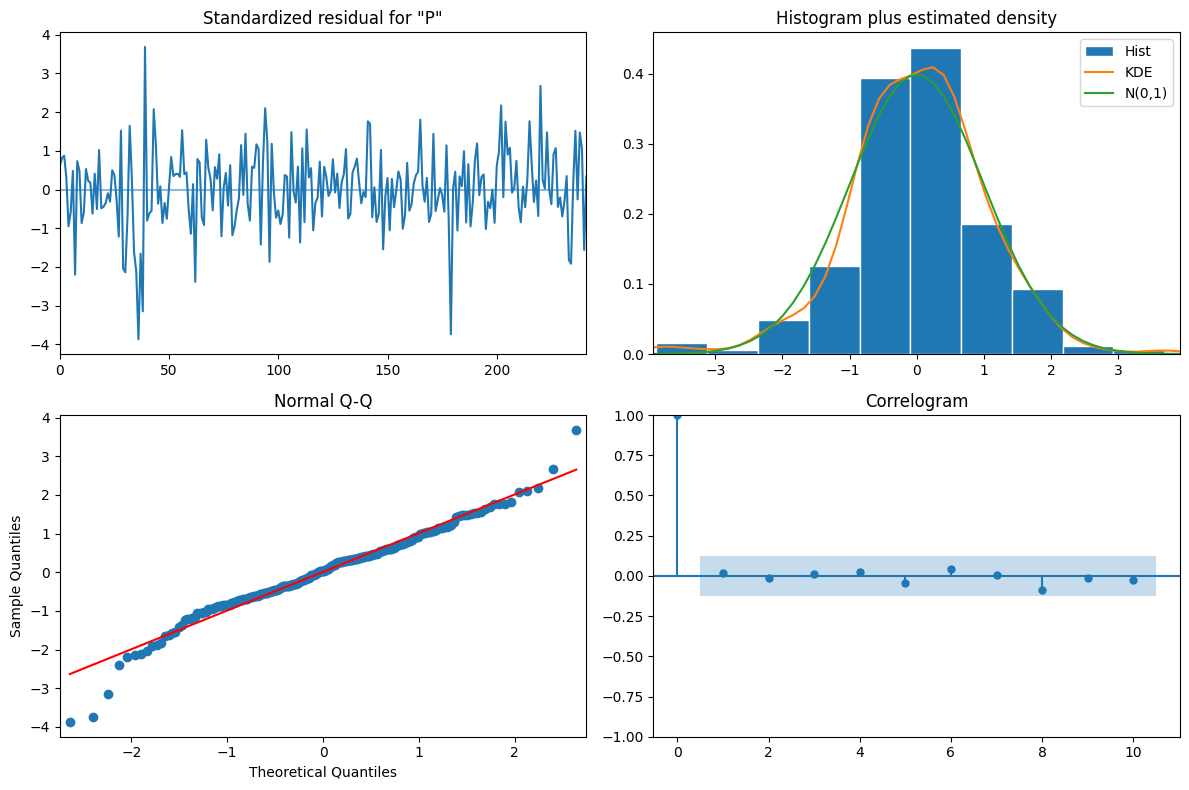

In [9]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

sarimax_model = SARIMAX(
    endog = y_train,
    exog = X_train,
    order=(0, 1, 0),
    # seasonal_order=(0,1,0,7)
    )
results = sarimax_model.fit(disp=False)
print(results.summary())

results.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

train a random forest regressor and xgb regressor and compare performance of different models
=> SARIMAX seems to perform the best.

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


pred = results.get_prediction(start=X_train.shape[0],
                              end=X_train.shape[0] + X_test.shape[0] - 1,
                              exog=X_test)
pred_ci = pred.conf_int()
pred_mean = pred.predicted_mean
pred_mean.index = X_test.index
print(f'''SARIMAX model:
Mean Squared Error: {mean_squared_error(y_test, pred_mean)}
R2 Score: {r2_score(y_test, pred_mean)}
''')


# Train non-timeseries regression models
rf_reg = RandomForestRegressor(max_depth=2, random_state=5)
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)

print(f'''RandomForestRegressor:
Mean Squared Error: {mean_squared_error(y_test, rf_pred)}
R2 Score: {r2_score(y_test, rf_pred)}
''')

from xgboost import XGBRegressor
xgb_reg = XGBRegressor(random_state=5)
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
print(f'''RandomForestRegressor:
Mean Squared Error: {mean_squared_error(y_test, xgb_pred)}
R2 Score: {r2_score(y_test, xgb_pred)}
''')

SARIMAX model:
Mean Squared Error: 69.79506367181196
R2 Score: 0.15625030373368698

RandomForestRegressor:
Mean Squared Error: 168.69755519010013
R2 Score: -1.039377908182963

RandomForestRegressor:
Mean Squared Error: 90.31680472847955
R2 Score: -0.09183619225173456



# Create Bollinger Bands and compare it with the SARIMAX predictions to make trading decisions.

* if the predicted price is lower than the lower bound—> buy
* if the predicted price is higher than the upper bound—> sell
* if within the Bollinger band, hold.

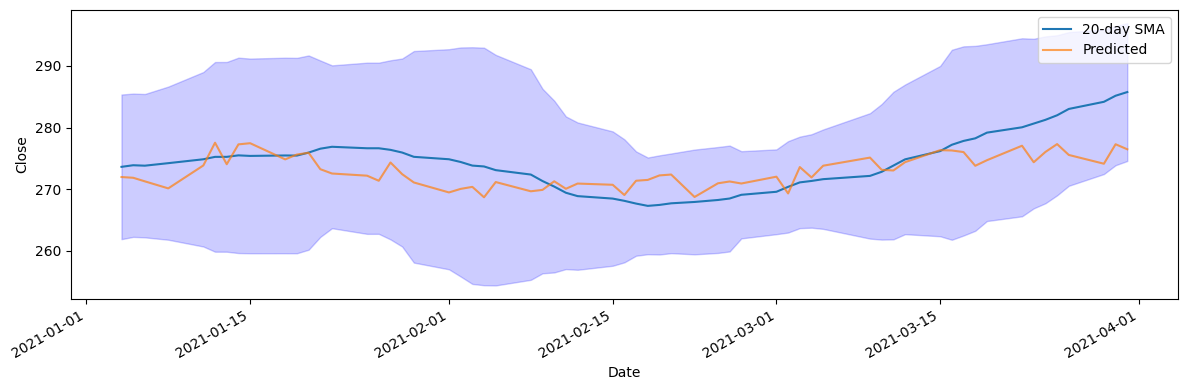

In [11]:
time_period = 20
rolling_mean = y.rolling(window=time_period).mean().loc[y_test.index]
rolling_std = y.rolling(window=time_period).std().loc[y_test.index]

ax = rolling_mean.plot(label='20-day SMA', figsize=(12, 4))
upper_band = (rolling_mean + (rolling_std * 2)).rename('Upper Band')
lower_band = (rolling_mean - (rolling_std * 2)).rename('Lower Band')

pred_mean.plot(ax=ax, label='Predicted', alpha=.7)

ax.fill_between(y_test.index,
                lower_band,
                upper_band,
                color='b', alpha=.2)


ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.legend()
plt.tight_layout()
plt.show()

Bollinger Band seem not useful since all predicted values are within the band.

Thus, use 20-day SMA to determine trading decision as follows:
* if the predicted price is lower than the SMA —> buy
* if the predicted price is higher than the SMA —> sell
* if within the Bollinger band, hold.

In [12]:
from datetime import timedelta
import numpy as np

weekly_trading_dates = [y_test.index[0] + timedelta(weeks = num_week)
                        for num_week in range(1, 13)]
# weekly_trading_dates = [weekly_trading_date if weekly_trading_date in y_test.index
#                         else weekly_trading_date + timedelta(days=1)
#                         for weekly_trading_date in weekly_trading_dates]

monthly_trading_dates = [(rolling_mean.index[0] + np.timedelta64(num_month, 'M')).replace(hour=0, minute=0, second=0, microsecond=0)
                        for num_month in range(1, 3)]

In [16]:
results_df = pd.concat([y_test, rolling_mean.rename('20-day SMA'), pred_mean.rename('Predicted')], axis=1)
results_df

,Price,20-day SMA,Predicted
Date,,,
2021-01-04,272.00,273.6285,271.975773
2021-01-05,275.20,273.8885,271.859874
2021-01-06,272.93,273.8170,271.278074
2021-01-08,283.64,274.2245,270.139706
2021-01-11,289.49,274.8545,273.853073
...,...,...,...
2021-03-25,286.66,281.9810,277.314277
2021-03-26,291.22,283.0065,275.554953
2021-03-29,293.30,284.1630,274.133572


In [50]:
for interval in ['Daily', 'Weekly', 'Monthly']:
    results_df[f'({interval}) Balance'] = 0
    results_df[f'({interval}) No. of Stock'] = 0
    results_df[f'({interval}) Trading Decision'] = 'Hold' # Default trading decision

daily_index_list = list(results_df.index)
last_index_list = [ daily_index_list[-1], weekly_trading_dates[-1], monthly_trading_dates[-1]]
for i in range(len(results_df)):
    current_index = daily_index_list[i]

    price = results_df.loc[current_index, 'Price'] 
    sma = results_df.loc[current_index, '20-day SMA']
    predicted = results_df.loc[current_index, 'Predicted']
    
    if i > 0:
        if current_index in weekly_trading_dates:
            previous_index = weekly_trading_dates[weekly_trading_dates.index(current_index)-1]
            interval = 'Weekly'
        elif current_index in monthly_trading_dates:
            previous_index = monthly_trading_dates[monthly_trading_dates.index(current_index)-1]
            interval = 'Monthly'
        else:
            previous_index = daily_index_list[i-1]
            interval = 'Daily'
        
        try:
            previous_balance = results_df.loc[previous_index, f'({interval}) Balance']
            previous_no_stock = results_df.loc[previous_index, f'({interval}) No. of Stock']
        except KeyError:
            print(current_index)
            print(previous_index)
            print(interval)

    else:
        previous_balance = 0
        previous_no_stock = 0

    if (((sma > predicted) or (current_index in last_index_list))\
        and (previous_no_stock > 0)):
            results_df.loc[current_index, f'({interval}) Trading Decision'] = 'Sell'
            results_df.loc[current_index, f'({interval}) Balance'] = previous_balance + previous_no_stock * price
            results_df.loc[current_index, f'({interval}) No. of Stock'] = 0       
    elif sma < predicted:
        no_stock_to_buy = max(1, previous_balance // price)
        results_df.loc[current_index, f'({interval}) Trading Decision'] = 'Buy'
        results_df.loc[current_index, f'({interval}) Balance'] = previous_balance - no_stock_to_buy * price
        results_df.loc[current_index, f'({interval}) No. of Stock'] = previous_no_stock + no_stock_to_buy
    else:
        results_df.loc[current_index, f'({interval}) Trading Decision'] = 'Hold'
        results_df.loc[current_index, f'({interval}) Balance'] = previous_balance
        results_df.loc[current_index, f'({interval}) No. of Stock'] = previous_no_stock

# for interval in ['Daily', 'Weekly', 'Monthly']:
#     print(results_df[f'({interval}) Trading Decision'].value_counts())

results_df.tail(60)

2021-03-15 00:00:00
2021-03-08 00:00:00
Weekly


,Price,20-day SMA,Predicted,(Daily) Balance,(Daily) No. of Stock,(Daily) Trading Decision,(Weekly) Balance,(Weekly) No. of Stock,(Weekly) Trading Decision,(Monthly) Balance,(Monthly) No. of Stock,(Monthly) Trading Decision
Date,,,,,,,,,,,,
2021-01-05,275.20,273.8885,271.859874,0.00,0,Hold,0.00,0,Hold,0.0,0,Hold
2021-01-06,272.93,273.8170,271.278074,0.00,0,Hold,0.00,0,Hold,0.0,0,Hold
2021-01-08,283.64,274.2245,270.139706,0.00,0,Hold,0.00,0,Hold,0.0,0,Hold
2021-01-11,289.49,274.8545,273.853073,0.00,0,Hold,0.00,0,Hold,0.0,0,Hold
2021-01-12,289.99,275.2440,277.534989,-289.99,1,Buy,0.00,0,Hold,0.0,0,Hold
2021-01-13,283.78,275.2465,274.053024,-6.21,0,Sell,0.00,0,Hold,0.0,0,Hold
2021-01-14,284.79,275.4885,277.267429,-291.00,1,Buy,0.00,0,Hold,0.0,0,Hold
2021-01-15,276.90,275.3985,277.458336,-567.90,2,Buy,0.00,0,Hold,0.0,0,Hold
2021-01-18,279.79,275.4705,274.837244,0.00,0,Hold,0.00,0,Hold,0.0,0,Hold


In [26]:
results_df.describe()

,Price,20-day SMA,Predicted,(Daily) Balance,(Daily) No. of Stock,(Weekly) Balance,(Weekly) No. of Stock,(Monthly) Balance,(Monthly) No. of Stock
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.0,61.0,61.0,61.0
mean,276.768852,274.330836,272.976872,-993.610328,0.393443,0.0,0.0,0.0,0.0
std,9.170538,4.570261,2.537596,1542.184013,0.492568,0.0,0.0,0.0,0.0
min,258.110000,267.306500,268.695443,-4898.310000,0.000000,0.0,0.0,0.0,0.0
25%,270.170000,271.111000,271.097381,-1610.210000,0.000000,0.0,0.0,0.0,0.0
50%,275.200000,274.415500,272.441202,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,284.790000,276.567500,274.837244,0.000000,1.000000,0.0,0.0,0.0,0.0
max,293.300000,285.742500,277.534989,0.000000,1.000000,0.0,0.0,0.0,0.0


In [ ]:
# If -1, sell at Open price
# if 1, buy at Open price

initial_balance = 1000
initial_no_stock = 20
previous_close_price = X_test_1['Close (-1 day)'].values[0]
intial_investment = initial_no_stock * previous_close_price
print(f'Initial investment: {initial_balance} + ({initial_no_stock} * {previous_close_price}) = {intial_investment}')
max_no_stock_to_trade = 2

first_index = results_df.index[0]
last_index = results_df.index[-1]

for i, row in results_df.iterrows():
    open = row['Open']
    close = row['Close']
    pred = row['Predicted Price Move']
    
    if i == first_index:
        previous_balance = initial_balance
        previous_no_stock = initial_no_stock
    else:
        previous_balance = results_df.loc[previous_index, 'Balance']
        previous_no_stock = results_df.loc[previous_index, 'No. of Stock']

    if (pred == 1) and (i != last_index) and (previous_balance >= open):
        # Today's price is predicted to go up. Buy at Open price.
        results_df.loc[i, 'Trade Decision'] = 'Buy'

        max_no_stock_to_buy = previous_balance // open
        no_stock_to_buy = min( max_no_stock_to_trade, max_no_stock_to_buy )

        results_df.loc[i, 'Balance'] = previous_balance - (open * no_stock_to_buy)
        results_df.loc[i, 'No. of Stock'] = previous_no_stock + no_stock_to_buy

    elif (pred == -1) or (i == last_index):
        # Today's price is predicted to go down. Sell at Open price.
        if previous_no_stock > 0:
            results_df.loc[i, 'Trade Decision'] = 'Sell'        
            
            if i == last_index:
                no_stock_to_sell = previous_no_stock
            else:
                no_stock_to_sell = min( max_no_stock_to_trade, previous_no_stock)

            results_df.loc[i, 'Balance'] = previous_balance + (open * no_stock_to_sell)
            results_df.loc[i, 'No. of Stock'] = previous_no_stock - no_stock_to_sell

        # Buy at Close price when no stock to sell at Open price
        # since Close price is predicted to be lower than Open price.
        elif (previous_balance > close) and not (i == last_index):
            results_df.loc[i, 'Trade Decision'] = 'Buy'
            max_no_stock_to_buy = previous_balance // close
            no_stock_to_buy = min( max_no_stock_to_trade, max_no_stock_to_buy )
            results_df.loc[i, 'Balance'] = previous_balance - (close * no_stock_to_buy)
            results_df.loc[i, 'No. of Stock'] = previous_no_stock + no_stock_to_buy

        else:
            results_df.loc[i, 'Trade Decision'] = 'Hold'
            results_df.loc[i, 'Balance'] = previous_balance
            results_df.loc[i, 'No. of Stock'] = previous_no_stock    

    else:
        results_df.loc[i, 'Trade Decision'] = 'Hold'
        results_df.loc[i, 'Balance'] = previous_balance
        results_df.loc[i, 'No. of Stock'] = previous_no_stock

    previous_index = i

results_df['Capital Return'] = results_df['Balance'] - initial_balance - intial_investment
results_df['Capital Return %'] = round(results_df['Capital Return'] / (intial_investment + initial_balance), 4)
results_df.tail(10)

In [ ]:
import pandas as pd
from datetime import timedelta

def add_data_from_past(df):
    original_index = df.index
    df = df.asfreq('D').ffill()

    df_prev_day = df.loc[ (df.index - timedelta(days=1))[1:] ].rename(
        columns = {column: column + ' (-1 day)' for column in df.columns})
    df_prev_day.index += timedelta(days=1)

    # df_prev_week = df.loc[ (df.index - timedelta(days=7))[7:] ].rename(
    #     columns = {column: column + ' (-1 week)' for column in df.columns})
    # df_prev_week.index += timedelta(days=7)

    # df_prev_month = df.loc[ (df.index - timedelta(days=30))[30:] ].rename(
    #     columns = {column: column + ' (-1 month)' for column in df.columns})
    # df_prev_month.index += timedelta(days=30)

    # concat_df = pd.concat([df, df_prev_day, df_prev_week, df_prev_month], axis=1)
    # concat_df = pd.concat([df, df_prev_day, df_prev_week], axis=1)
    concat_df = pd.concat([df, df_prev_day], axis=1)
    
    concat_df = concat_df.loc[original_index]

    return concat_df

In [ ]:
def add_bollinger_bands(df, column, time_period, coeff_std):
    rolling_mean = df[column].rolling(window=time_period).mean()
    rolling_std = df[column].rolling(window=time_period).std()

    # Calculate upper and lower Bollinger Bands
    df['Upper Band'] = rolling_mean + (rolling_std * coeff_std)
    df['Lower Band'] = rolling_mean - (rolling_std * coeff_std)

    return add_trading_decisions(df.dropna(), column)


def add_trading_decisions(df, column):
    for idx, val in df[column].items():
        if val <= df.loc[idx, 'Lower Band']:
            df.loc[idx, 'Trading Decision'] = 'Buy'
        elif val >= df.loc[idx, 'Upper Band']:
            df.loc[idx, 'Trading Decision'] = 'Sell'
        else:
            df.loc[idx, 'Trading Decision'] = 'Hold'
    
    return df

In [ ]:
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

time_period = 20 # typicall value: 20
coeff_std = 2 # typicall value: 2

train_dfs = {}
for name, df in data_dfs.items():
    df_updated_1 = df.set_index('Date').sort_index().rename(columns={'Price': 'Close'})
    df_updated_1['Vol.'] = df_updated_1['Vol.'].apply(convert_vol_to_float)
    
    df_updated_2 = add_bollinger_bands(df_updated_1, 'Close', time_period, coeff_std)
    
    # df_updated_2 = add_data_from_past(df_updated_1)
    df_final = df_updated_2.dropna()
    train_dfs[name] = df_final
#     train_df = df_copy[df_copy['Date'].dt.year == 2020]\
#             .set_index('Date').sort_index()\
#             .rename(columns={'Price': 'Close'})
#     test_df = df_copy[df_copy['Date'].dt.year == 2021]\
#             .set_index('Date').sort_index()\
#             .rename(columns={'Price': 'Close'})
#     train_dfs[name] = (train_df, test_df)

stock_name_1 = full_sheet_names[0]
# train_df_1, test_df_1 = train_dfs[stock_name_1]
df_1 = train_dfs[stock_name_1]
df_1['Trading Decision'].value_counts()

Hold    259
Sell     22
Buy      11
Name: Trading Decision, dtype: int64

In [ ]:
df_1.head()

,Close,Open,High,Low,Vol.,Change %,Upper Band,Lower Band,Trading Decision
Date,,,,,,,,,
2020-03-17,184.01,195.00,204.78,183.80,184150000.0,-0.0605,256.368535,233.967465,Buy
2020-03-18,174.27,179.00,182.20,172.15,155010000.0,-0.0529,255.798370,231.308430,Buy
2020-03-19,189.51,178.50,190.15,173.06,187430000.0,0.0875,255.066831,229.464369,Buy
2020-03-20,195.69,198.62,201.86,192.05,170580000.0,0.0326,254.152154,227.840646,Buy
2020-03-23,183.37,188.00,190.99,182.10,157890000.0,-0.0630,253.214404,225.793596,Buy


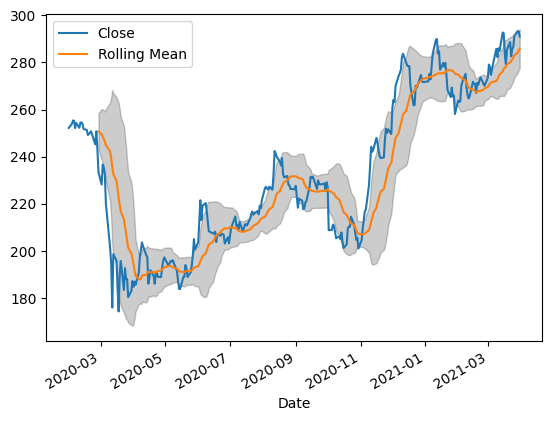

In [ ]:
import matplotlib.pyplot as plt

# Define time period and calculate rolling mean and standard deviation
time_period = 20 # typicall value: 20
coeff_std = 2.5 # typicall value: 2
rolling_mean = df_1['Close'].rolling(window=time_period).mean()
rolling_std = df_1['Close'].rolling(window=time_period).std()

# Calculate upper and lower Bollinger Bands
upper_band = rolling_mean + (rolling_std * 1.5)
lower_band = rolling_mean - (rolling_std * 1.5)

# Plot the data and the Bollinger Bands
ax = df_1['Close'].plot(label='Close')
plt.plot(rolling_mean, label='Rolling Mean')
ax.fill_between(
    rolling_mean.index,
    upper_band,
    lower_band,
    color='k', alpha=.2
)
# plt.plot(upper_band, label='Upper Bollinger Band')
# plt.plot(lower_band, label='Lower Bollinger Band')
plt.legend()
plt.show()

add details from the previous date, week, and month as training features, and predict whether today's 'Change %' will be positive or negative.

if predicted to be positive, buy. if predicted to be negative, sell. otherwise hold. add a target column based on the trading decision made based on the predicted change % - buy = 1, hold = 0, and sell = -1. This would be a regression problem?

In [ ]:
# df_1['Price Move'] = df_1['Change %'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
# Trading decision: 1=Buy, 0=Hold, -1=Sell

train_df_1 = df_1[df_1.index.year == 2020]
X_train_1 = train_df_1.iloc[:, 6:-1]
y_train_1 = train_df_1['Close']

test_df_1 = df_1[df_1.index.year == 2021]
X_test_1 = test_df_1.iloc[:, 6:-1]
y_test_1 = test_df_1['Close']

In [ ]:
X_train_1.head()

,Close (-1 day),Open (-1 day),High (-1 day),Low (-1 day),Vol. (-1 day),Change % (-1 day)
Date,,,,,,
2020-01-06,255.00,255.99,258.19,253.70,35850000.0,0.0010
2020-01-08,253.90,254.75,254.84,251.40,22350000.0,-0.0043
2020-01-09,259.15,253.57,259.15,253.03,40820000.0,0.0207
2020-01-10,257.99,259.40,261.76,257.01,38330000.0,-0.0045
2020-01-13,258.19,257.86,259.25,256.88,18850000.0,0.0008


In [ ]:
y_train_1.value_counts()

250.80    2
228.17    2
254.50    2
188.90    2
222.21    1
         ..
189.00    1
193.98    1
192.40    1
191.00    1
271.65    1
Name: Close, Length: 245, dtype: int64

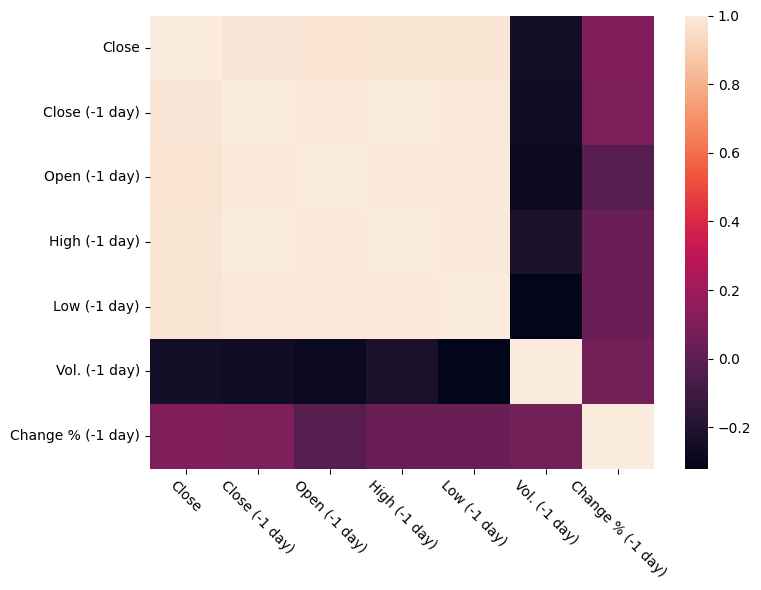

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
corr_df = pd.concat([
    y_train_1,
    X_train_1],
    axis=1).corr()
sns.heatmap(corr_df)
plt.xticks(rotation = -45)
plt.tight_layout()

In [ ]:
cols_to_drop = []
for idx, corr in corr_df['Close'].iteritems():
    if abs(corr) <= 0.5:
        cols_to_drop.append(idx)
cols_to_drop

C:\Users\Admin\AppData\Local\Temp\ipykernel_1436\3023723758.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, corr in corr_df["Close"].iteritems():


['Vol. (-1 day)', 'Change % (-1 day)']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_reg = RandomForestRegressor(max_depth=2, random_state=5)
rf_reg.fit(X_train_1, y_train_1)
rf_pred = rf_reg.predict(X_test_1)
mean_squared_error(y_test_1, rf_pred), r2_score(y_test_1, rf_pred)
# No changes after dropping cols_to_drop.

(175.40522503524377, -1.1204666571109243)

In [ ]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(random_state=5)
xgb_reg.fit(X_train_1.drop(cols_to_drop, axis=1), y_train_1)
xgb_pred = xgb_reg.predict(X_test_1.drop(cols_to_drop, axis=1))
mean_squared_error(y_test_1, xgb_pred), r2_score(y_test_1, xgb_pred)
# Results improved after dropping cols_to_drop.

(54.27485979198521, 0.3438734194768108)

In [ ]:
pd.Series(xgb_pred).describe()

count     61.000000
mean     273.566040
std        5.650477
min      259.265076
25%      270.289795
50%      274.618805
75%      277.415649
max      283.455353
dtype: float64

In [ ]:
y_test_1.describe()

count     61.000000
mean     276.768852
std        9.170538
min      258.110000
25%      270.170000
50%      275.200000
75%      284.790000
max      293.300000
Name: Close, dtype: float64

In [ ]:
results_df = pd.concat([
    df_1.loc[y_test_1.index][['Close', 'Open', 'High', 'Low']],
    X_test_1[['Close (-1 day)']]
], axis=1)
results_df['Predicted Price Move'] = xgb_preds
results_df

# Predicted Price Move is based on data from previous day, week and month.
# If -1, sell at Open price and buy at Close Price
# if 1, buy at Open price and sell at Close price.

,Close,Open,High,Low,Close (-1 day),Predicted Price Move
Date,,,,,,
2021-01-04,272.00,274.67,276.60,270.61,271.65,-1
2021-01-05,275.20,272.69,275.70,270.28,272.00,1
2021-01-06,272.93,275.94,275.94,271.62,275.20,1
2021-01-08,283.64,275.11,283.99,275.11,272.93,-1
2021-01-11,289.49,282.86,292.95,279.48,283.64,1
...,...,...,...,...,...,...
2021-03-25,286.66,286.50,287.03,283.85,285.79,-1
2021-03-26,291.22,288.63,292.75,288.32,286.66,-1
2021-03-29,293.30,289.72,294.09,289.26,291.22,-1


In [ ]:
# If -1, sell at Open price
# if 1, buy at Open price

initial_balance = 1000
initial_no_stock = 20
previous_close_price = X_test_1['Close (-1 day)'].values[0]
intial_investment = initial_no_stock * previous_close_price
print(f'Initial investment: {initial_balance} + ({initial_no_stock} * {previous_close_price}) = {intial_investment}')
max_no_stock_to_trade = 2

first_index = results_df.index[0]
last_index = results_df.index[-1]

for i, row in results_df.iterrows():
    open = row['Open']
    close = row['Close']
    pred = row['Predicted Price Move']
    
    if i == first_index:
        previous_balance = initial_balance
        previous_no_stock = initial_no_stock
    else:
        previous_balance = results_df.loc[previous_index, 'Balance']
        previous_no_stock = results_df.loc[previous_index, 'No. of Stock']

    if (pred == 1) and (i != last_index) and (previous_balance >= open):
        # Today's price is predicted to go up. Buy at Open price.
        results_df.loc[i, 'Trade Decision'] = 'Buy'

        max_no_stock_to_buy = previous_balance // open
        no_stock_to_buy = min( max_no_stock_to_trade, max_no_stock_to_buy )

        results_df.loc[i, 'Balance'] = previous_balance - (open * no_stock_to_buy)
        results_df.loc[i, 'No. of Stock'] = previous_no_stock + no_stock_to_buy

    elif (pred == -1) or (i == last_index):
        # Today's price is predicted to go down. Sell at Open price.
        if previous_no_stock > 0:
            results_df.loc[i, 'Trade Decision'] = 'Sell'        
            
            if i == last_index:
                no_stock_to_sell = previous_no_stock
            else:
                no_stock_to_sell = min( max_no_stock_to_trade, previous_no_stock)

            results_df.loc[i, 'Balance'] = previous_balance + (open * no_stock_to_sell)
            results_df.loc[i, 'No. of Stock'] = previous_no_stock - no_stock_to_sell

        # Buy at Close price when no stock to sell at Open price
        # since Close price is predicted to be lower than Open price.
        elif (previous_balance > close) and not (i == last_index):
            results_df.loc[i, 'Trade Decision'] = 'Buy'
            max_no_stock_to_buy = previous_balance // close
            no_stock_to_buy = min( max_no_stock_to_trade, max_no_stock_to_buy )
            results_df.loc[i, 'Balance'] = previous_balance - (close * no_stock_to_buy)
            results_df.loc[i, 'No. of Stock'] = previous_no_stock + no_stock_to_buy

        else:
            results_df.loc[i, 'Trade Decision'] = 'Hold'
            results_df.loc[i, 'Balance'] = previous_balance
            results_df.loc[i, 'No. of Stock'] = previous_no_stock    

    else:
        results_df.loc[i, 'Trade Decision'] = 'Hold'
        results_df.loc[i, 'Balance'] = previous_balance
        results_df.loc[i, 'No. of Stock'] = previous_no_stock

    previous_index = i

results_df['Capital Return'] = results_df['Balance'] - initial_balance - intial_investment
results_df['Capital Return %'] = round(results_df['Capital Return'] / (intial_investment + initial_balance), 4)
results_df.tail(10)

Initial investment: 1000 + (20 * 271.65) = 5433.0


,Close,Open,High,Low,Close (-1 day),Predicted Price Move,Trade Decision,Balance,No. of Stock,Capital Return,Capital Return %
Date,,,,,,,,,,,
2021-03-18,279.25,284.04,285.79,278.24,283.35,-1,Sell,4045.04,10.0,-2387.96,-0.3712
2021-03-19,285.47,279.00,286.31,278.03,279.25,-1,Sell,4603.04,8.0,-1829.96,-0.2845
2021-03-22,288.65,285.00,291.20,283.08,285.47,1,Buy,4033.04,10.0,-2399.96,-0.3731
2021-03-23,282.60,287.56,288.30,282.11,288.65,1,Buy,3457.92,12.0,-2975.08,-0.4625
2021-03-24,285.79,283.40,288.00,282.25,282.60,-1,Sell,4024.72,10.0,-2408.28,-0.3744
2021-03-25,286.66,286.50,287.03,283.85,285.79,-1,Sell,4597.72,8.0,-1835.28,-0.2853
2021-03-26,291.22,288.63,292.75,288.32,286.66,-1,Sell,5174.98,6.0,-1258.02,-0.1956
2021-03-29,293.30,289.72,294.09,289.26,291.22,-1,Sell,5754.42,4.0,-678.58,-0.1055
2021-03-30,293.25,294.86,295.72,291.50,293.30,-1,Sell,6344.14,2.0,-88.86,-0.0138


In [ ]:
results_df['Trade Decision'].value_counts()

Sell    33
Buy     23
Hold     5
Name: Trade Decision, dtype: int64

In [ ]:
results_df['Predicted Price Move'].value_counts()

-1    44
 1    17
Name: Predicted Price Move, dtype: int64

In [ ]:
y_test_1.value_counts()

 1    31
-1    29
 0     1
Name: Price Move, dtype: int64

In [ ]:
ground_truth_df = pd.concat([X_test_1[['Upper Band', 'Lower Band']], test_df_1[['Close']]], axis=1)

KeyError: "None of [Index(['Upper Band', 'Lower Band'], dtype='object')] are in the [columns]"

In [ ]:
initial_balance = 1000
initial_no_stock = 20
previous_close_price = X_test_1['Close (-1 day)'].values[0]
intial_investment = initial_no_stock * previous_close_price
print(f'Initial investment: {initial_balance} + ({initial_no_stock} * {previous_close_price}) = {intial_investment}')
max_no_stock_to_trade = 2

first_index = ground_truth_df.index[0]
last_index = ground_truth_df.index[-1]

for i, row in ground_truth_df.iterrows():
    upper = row['Upper Band']
    lower = row['Lower Band']
    close = row['Close']
    
    if i == first_index:
        previous_balance = initial_balance
        previous_no_stock = initial_no_stock
    else:
        previous_balance = ground_truth_df.loc[previous_index, 'Balance']
        previous_no_stock = ground_truth_df.loc[previous_index, 'No. of Stock']

    if (close < lower) and (i != last_index) and (previous_balance >= close):
        # Today's price is predicted to go up. Buy at Open price.
        ground_truth_df.loc[i, 'Trade Decision'] = 'Buy'

        max_no_stock_to_buy = previous_balance // close
        no_stock_to_buy = min( max_no_stock_to_trade, max_no_stock_to_buy )

        ground_truth_df.loc[i, 'Balance'] = previous_balance - (close * no_stock_to_buy)
        ground_truth_df.loc[i, 'No. of Stock'] = previous_no_stock + no_stock_to_buy

    elif close > upper:
        # Based on the Bollinger Bands, sell at Close price
        ground_truth_df.loc[i, 'Trade Decision'] = 'Sell'        
        
        if i == last_index:
            no_stock_to_sell = previous_no_stock
        else:
            no_stock_to_sell = min( max_no_stock_to_trade, previous_no_stock)

        ground_truth_df.loc[i, 'Balance'] = previous_balance + (open * no_stock_to_sell)
        ground_truth_df.loc[i, 'No. of Stock'] = previous_no_stock - no_stock_to_sell

    else:
        ground_truth_df.loc[i, 'Trade Decision'] = 'Hold'
        ground_truth_df.loc[i, 'Balance'] = previous_balance
        ground_truth_df.loc[i, 'No. of Stock'] = previous_no_stock

    previous_index = i

ground_truth_df['Capital Return'] = ground_truth_df['Balance'] - initial_balance - intial_investment
ground_truth_df['Capital Return %'] = round(ground_truth_df['Capital Return'] / (intial_investment + initial_balance), 4)
ground_truth_df.tail(60)

Initial investment: 1000 + (20 * 271.65) = 5433.0


,Upper Band,Lower Band,Close,Trade Decision,Balance,No. of Stock,Capital Return,Capital Return %
Date,,,,,,,,
2021-01-05,285.493915,262.283085,275.20,Hold,1000.00,20.0,-5433.00,-0.8446
2021-01-06,285.427803,262.206197,272.93,Hold,1000.00,20.0,-5433.00,-0.8446
2021-01-08,286.627575,261.821425,283.64,Hold,1000.00,20.0,-5433.00,-0.8446
2021-01-11,288.987067,260.721933,289.49,Sell,1588.00,18.0,-4845.00,-0.7531
2021-01-12,290.604974,259.883026,289.99,Hold,1588.00,18.0,-4845.00,-0.7531
2021-01-13,290.613304,259.879696,283.78,Hold,1588.00,18.0,-4845.00,-0.7531
2021-01-14,291.312817,259.664183,284.79,Hold,1588.00,18.0,-4845.00,-0.7531
2021-01-15,291.166285,259.630715,276.90,Hold,1588.00,18.0,-4845.00,-0.7531
2021-01-18,291.308028,259.632972,279.79,Hold,1588.00,18.0,-4845.00,-0.7531


In [ ]:
1. add 20 days rolling averages +- 2 std as upper and lower bands. use both the training and test data.

2. filter for data in 2021 by using index.

3. get trading decision based on the bollinger band

4. get the hypothetical capital return based on the trading decision based on the bollinger band.

5. compare the decisions and capital return with the predicted decisions and capital return by the model.

* if the predicted price is lower than the lower bound—> buy
* if the predicted price is higher than the upper bound—> sell
* if within the Bollinger band, hold.



SyntaxError: invalid syntax (2599436890.py, line 1)

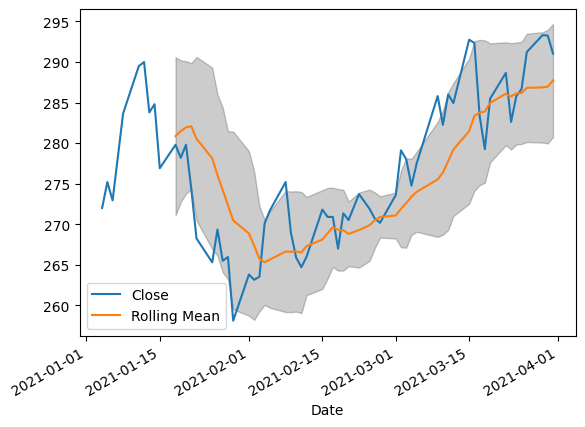

In [ ]:
import matplotlib.pyplot as plt

# Define time period and calculate rolling mean and standard deviation
time_period = 10
rolling_mean = test_df_1['Close'].rolling(window=time_period).mean()
rolling_std = test_df_1['Close'].rolling(window=time_period).std()

# Calculate upper and lower Bollinger Bands
upper_band = rolling_mean + (rolling_std * 1.5)
lower_band = rolling_mean - (rolling_std * 1.5)

# Plot the data and the Bollinger Bands
ax = test_df_1['Close'].plot(label='Close')
plt.plot(rolling_mean, label='Rolling Mean')
ax.fill_between(
    rolling_mean.index,
    upper_band,
    lower_band,
    color='k', alpha=.2
)
# plt.plot(upper_band, label='Upper Bollinger Band')
# plt.plot(lower_band, label='Lower Bollinger Band')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

random_state = 5
n_splits = 1
n_repeats = 1

le = LabelEncoder()
xgb_clf = XGBClassifier(random_state=random_state)
xgb_clf.fit(X_train_1, le.fit_transform(y_train_1)) 
preds = le.inverse_transform( xgb_clf.predict(X_test_1) )

cm = confusion_matrix(y_test_1, preds)
print(cm)
print(accuracy_score(y_test_1, preds))

# create MultiOutputClassifier instance with XGBoost model inside
multilabel_model = MultiOutputClassifier(xgb_clf)

scores = cross_val_score(xgb_clf,
                         X_train_1,
                         y_train_1.values.reshape(-1, 1),
                         scoring='roc_auc', # roc_auc, accuracy, f1
                        #  cv=RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)
                         )
score_stats = {
    'Mean': round(np.mean(scores), 4),
    'Std': round(np.std(scores), 4),
    'Max': round(np.max(scores), 4),
    '75th Percentile': round(np.percentile(scores, 75), 4),
    'Median': round(np.median(scores), 4),
    '25th Percentile': round(np.percentile(scores, 25), 4),
    'Min': round(np.min(scores), 4)
    }

[[16 13]
 [15 17]]
0.5409836065573771


In [ ]:
df_1.resample('W').max()

,Close,Open,High,Low,Vol.,Change %,Close (-1 day),Open (-1 day),High (-1 day),Low (-1 day),Vol. (-1 day),Change % (-1 day)
Date,,,,,,,,,,,,
2020-01-05,255.00,255.99,258.19,253.70,35850000.0,0.0010,255.00,255.99,258.19,253.70,35850000.0,0.0010
2020-01-12,259.15,259.40,261.76,257.01,40820000.0,0.0207,259.15,259.40,261.76,257.01,40820000.0,0.0207
2020-01-19,262.50,262.50,263.22,258.62,49360000.0,0.0194,262.50,262.50,263.22,258.62,49360000.0,0.0194
2020-01-26,268.06,268.72,270.80,265.50,44280000.0,0.0144,268.06,268.72,270.80,265.50,44910000.0,0.0194
2020-02-02,259.94,261.00,262.10,257.61,56450000.0,0.0093,265.49,264.50,267.50,264.21,56450000.0,0.0093
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-07,279.10,281.70,283.83,277.63,91990000.0,0.0202,279.10,281.70,283.83,277.63,91990000.0,0.0202
2021-03-14,286.00,286.30,288.00,282.82,83550000.0,0.0299,286.00,286.30,288.00,282.82,83550000.0,0.0299
2021-03-21,292.74,293.06,293.88,288.61,110290000.0,0.0274,292.74,293.06,293.88,288.61,110290000.0,0.0274


In [ ]:
# Downsampling and aggregating by taking the mean of each hour
collapsed_data = df.resample('H').mean()

# Downsampling and aggregating by taking the sum of each day
collapsed_data = df.resample('D').sum()

# Downsampling and aggregating by taking the maximum value of each month
collapsed_data = df.resample('M').max()

features to add:

1. close/open/high/row/vol./change% price from previous date, week, month (for daily, weekly, and monthly prediction). First date/week/month depending on the prediction frequency will have no data.
2. 

- Try a simpler/minimal features and a simpler model first.

- Can try non-time-series model because there's little seasonality in the data.

- Should only use data that will be available at the time of prediction. Can create features like 'Closing price from the last trading day', 'average closing price in the past week', etc. Other features that will not be available at the time of prediction should not be used for training and making predictions.

- For weekly predictions, trading will happen only once a week. e.g. this Friday, make prediction for next Friday and decide what trading decision to make next Friday. if the prediction is below lowerbound in Bollinger band, buy. if above upperband, sell. if within the Bollinger band, hold.

* in pandas, there's a function to collapse the timeseries data into weekly, etc.
* for making weekly predictions, first week will have no features because of it. can use timedelta to shift dates.

### <b>3. Add features and plot data</b>

- 3-1. add weekly/monthly/quarterly rolling average (or simple moving average; SMA), EMA (exponential MA)

One advantage of the EMA over SMA is that EMA is more responsive to price changes, which makes it useful for short-term trading.
    SMA assigns equal weights to all historical data points,
    EMA applies higher weights to recent prices

In [ ]:
train_df_1 = add_moving_average(train_df_1)
test_df_1 = add_moving_average(test_df_1)

- 3-2. Get datetime values from index and add them as new features

In [ ]:
train_df_1 = add_datetime_features(train_df_1, year=False, month=True, day=True, weekday=True)
test_df_1 = add_datetime_features(test_df_1, year=False, month=True, day=True, weekday=True)

- 3-3. STL decomposition (Seasonal and Trend decomposition using Loess (locally estimated scatterplot smoothing?))

Plot seasonal componets of train_df_1:


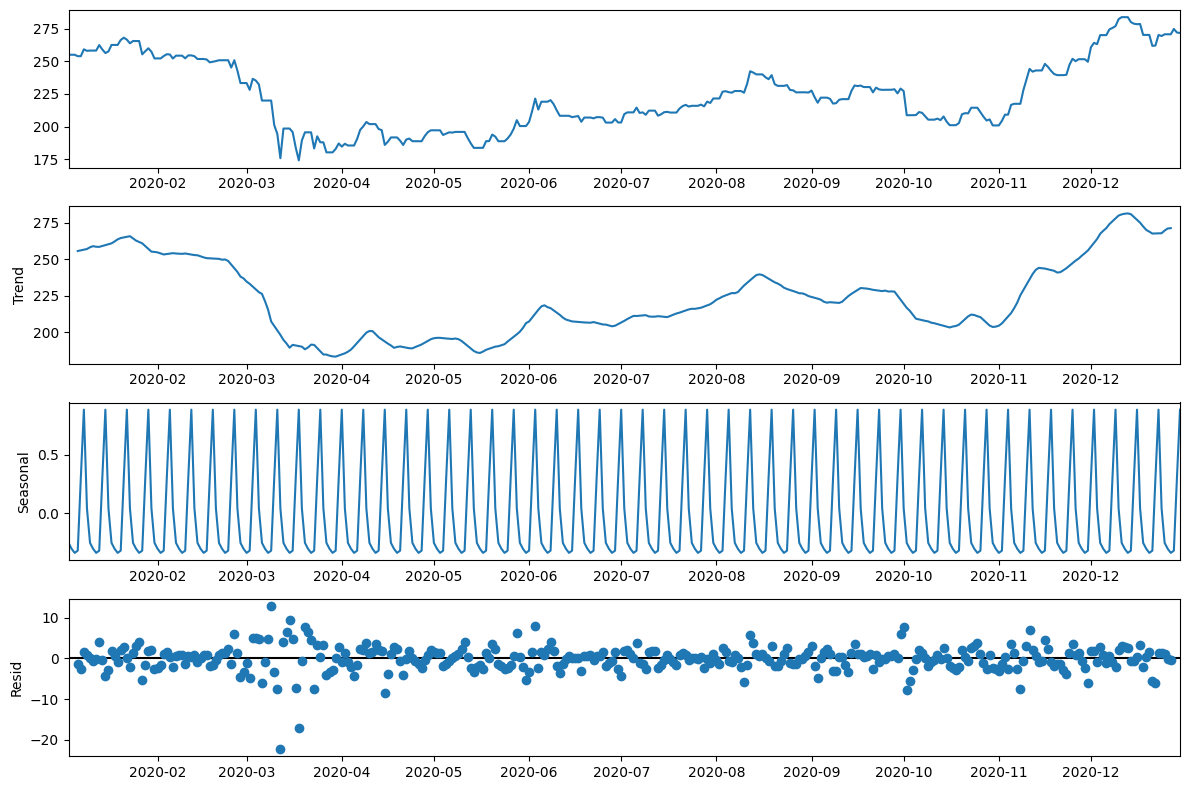

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

print('Plot seasonal componets of train_df_1:')
train_df_1 = add_seasonal_components(df=train_df_1, frequency='D', column='Close', add_to_df=True, plot=True)
test_df_1 = add_seasonal_components(df=test_df_1, frequency='D', column='Close', add_to_df=True, plot=False)

the original data (first plot) is very similar to the Trend data (second plot), indicating seasonality in the timeseries data is not significant.

- 3-4. PACF: the autocorrelation function

The PACF is an alternative to the ACF. Rather than giving the autocorrelations, it gives you the partial autocorrelation. This autocorrelation is called partial, because with each step back in the past, only additional autocorrelation is listed. This is different from the ACF, as the ACF contains duplicate correlations when variability can be explained by multiple points in time.

you will see a blue area in the ACF and PACF plots, which depicts the 95% confidence interval and is in indicator for the significance threshold. That means, anything within the blue area is statistically close to zero and anything outside the blue area is statistically non-zero.

The autocorrelation analysis helps in detecting hidden patterns and seasonality and in checking for randomness. It is especially important when you intend to use an ARIMA model for forecasting because the autocorrelation analysis helps to identify the AR and MA parameters for the ARIMA model.

In [ ]:
# from statsmodels.graphics.tsaplots import plot_acf
# plot_acf(train_df_1['Close'])

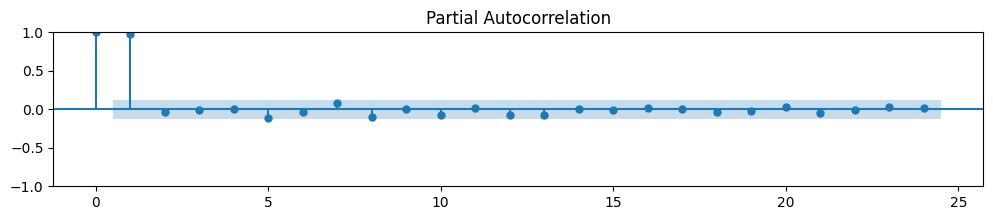

In [ ]:
rcParams['figure.figsize'] = 12, 2
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train_df_1['Close'], method='ywm');

There's little autocorrelation after the first two dates, meaning only the next date would be highly correlated with each date in the timeseries data, which makes sense for stock market price data.

### <b>4. normalize scales</b>

* use the StandardScaler, rather than the MinMaxScaler,
The reason is that stock prices are ever-changing, and there are no true min or max values.
It doesn’t make sense to use the MinMaxScaler, although this choice probably won’t lead to
disastrous results at the end of the day;

In [ ]:
normalized_train_df_1, normalized_test_df_1 = normalize_scale(train_df_1, test_df_1, method='standard', exclude_column='Close')
normalized_train_df_1.describe()

,Close,Open,High,Low,Vol.,Change %,Weekly SMA,Monthly SMA,Quarterly SMA,Weekly EMA,Monthly EMA,Quarterly EMA,Month,Day,Weekday,Trend,Seasonal,Residual
count,250.000000,2.500000e+02,2.500000e+02,2.500000e+02,250.000000,2.500000e+02,2.440000e+02,2.210000e+02,1.600000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02,2.460000e+02,2.500000e+02,2.460000e+02
mean,224.216280,-2.842171e-17,1.122658e-15,1.705303e-16,0.000000,-2.131628e-17,1.747236e-16,1.253899e-15,-1.554312e-16,4.973799e-16,-5.115908e-16,2.273737e-15,1.136868e-16,9.903189e-17,3.108624e-17,-5.487932e-16,-2.664535e-18,7.220963e-18
std,26.778554,1.002006e+00,1.002006e+00,1.002006e+00,1.002006,1.002006e+00,1.002056e+00,1.002270e+00,1.003140e+00,1.002006e+00,1.002006e+00,1.002006e+00,1.002006e+00,1.002006e+00,1.002006e+00,1.002039e+00,1.002006e+00,1.002039e+00
min,174.270000,-1.842935e+00,-1.686389e+00,-1.822672e+00,-1.522260,-4.147471e+00,-1.481173e+00,-1.466743e+00,-1.646413e+00,-1.484374e+00,-1.442682e+00,-1.158744e+00,-1.625037e+00,-1.729325e+00,-1.422742e+00,-1.551809e+00,-1.036980e+00,-6.814241e+00
25%,203.790000,-7.644503e-01,-7.795605e-01,-7.446363e-01,-0.687759,-4.580563e-01,-6.786079e-01,-7.548754e-01,-8.062869e-01,-6.950752e-01,-8.445118e-01,-8.044405e-01,-7.532358e-01,-8.094714e-01,-7.142049e-01,-7.319138e-01,-8.834194e-01,-4.569990e-01
50%,220.145000,-1.568639e-01,-1.728705e-01,-1.642128e-01,-0.208069,-5.499641e-03,-1.445320e-01,-6.522494e-02,8.375928e-02,-1.299714e-01,-1.258661e-01,-3.393298e-01,1.185649e-01,-4.599269e-03,-5.668293e-03,-1.561760e-01,-2.016100e-01,8.697638e-02
75%,247.825000,8.930813e-01,8.577104e-01,8.459921e-01,0.388021,5.418784e-01,7.749575e-01,4.754287e-01,5.325338e-01,8.357387e-01,8.336402e-01,6.211810e-01,9.903656e-01,8.002728e-01,7.028683e-01,7.779803e-01,3.921471e-01,5.177492e-01
max,283.730000,2.288127e+00,2.295581e+00,2.183162e+00,4.603962,5.537242e+00,2.198452e+00,2.341664e+00,2.141993e+00,2.093425e+00,1.824321e+00,2.056014e+00,1.571566e+00,1.720127e+00,1.411405e+00,2.225260e+00,1.740114e+00,2.432579e+00


### <b>5. perform EDA, assess feature importance (feature selection)</b>

check feature importance and only use relevant ones
- run_chi_tests (chi-square test of independce) (Happy Customers, Term Deposit Marketing)
- correlation
- plot_histograms (Term Deposit Marketing)
- get_top_features (EDA and feature selection) (milestone 2)

Distribution of target "Close" and dependent variables:


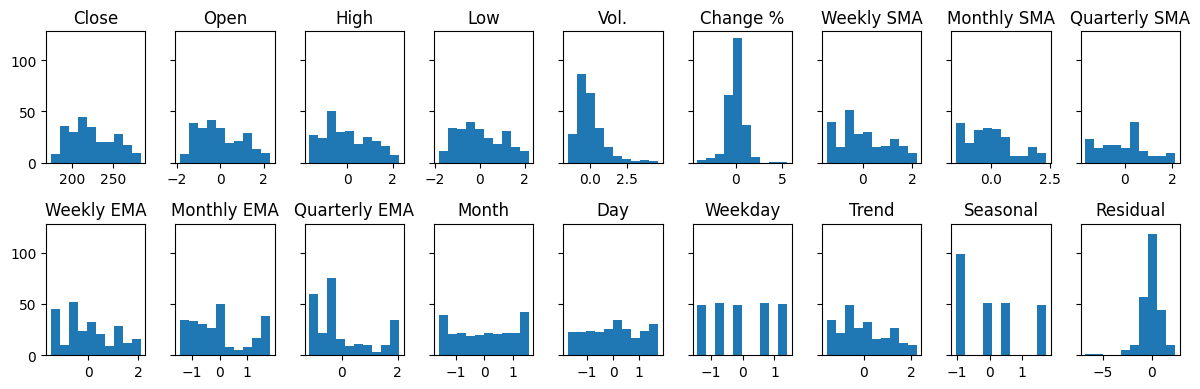

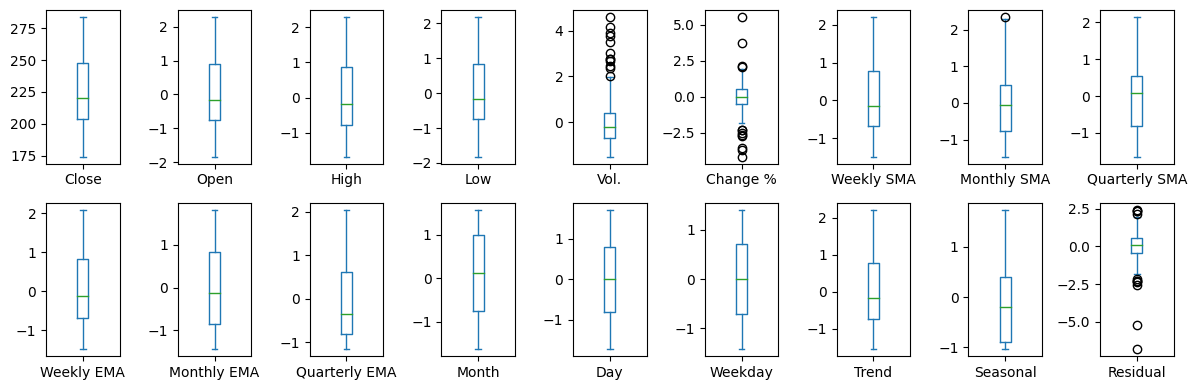

In [ ]:
plot_histograms(data=normalized_train_df_1,
                target='Close', target_figsize=(2,2),
                dependent_layout=(2,9), dependent_figsize=(12, 4),
                include_boxplots=True)

In [ ]:
results_dfs = run_chi_tests(normalized_train_df_1, target='Close', significance_level=0.05,
                            plot_title=None, plot_title_y=None,
                            plot_row=3, plot_col=6, figsize=None, plot=False,
                            rotate_x_label_col=[], rotate_angle=None,
                            h_pad=3, print_result_df=False,
                            independence_test=True,
                            goodness_of_fit_test=False)

print('''
If the null hypothesis is not rejected at the significance level of 0.05,
the Variable and the target (i.e. Close) are independent of each other.
''')
results_dfs[0]


If the null hypothesis is not rejected at the significance level of 0.05,
the Variable and the target (i.e. Close) are independent of each other.



,Independent Variable,Chi-square,P-value,Reject Null Hypothesis at alpha=0.05?
Variable,,,,
Weekly EMA,NaN,61250.000000,0.241223,No
Monthly EMA,NaN,61250.000000,0.241223,No
Quarterly EMA,NaN,61250.000000,0.241223,No
Vol.,NaN,60250.000000,0.257685,No
High,NaN,59750.000000,0.266231,No
Low,NaN,59750.000000,0.266231,No
Trend,NaN,59286.000000,0.241247,No
Residual,NaN,59286.000000,0.241247,No
Weekly SMA,NaN,58072.000000,0.245398,No


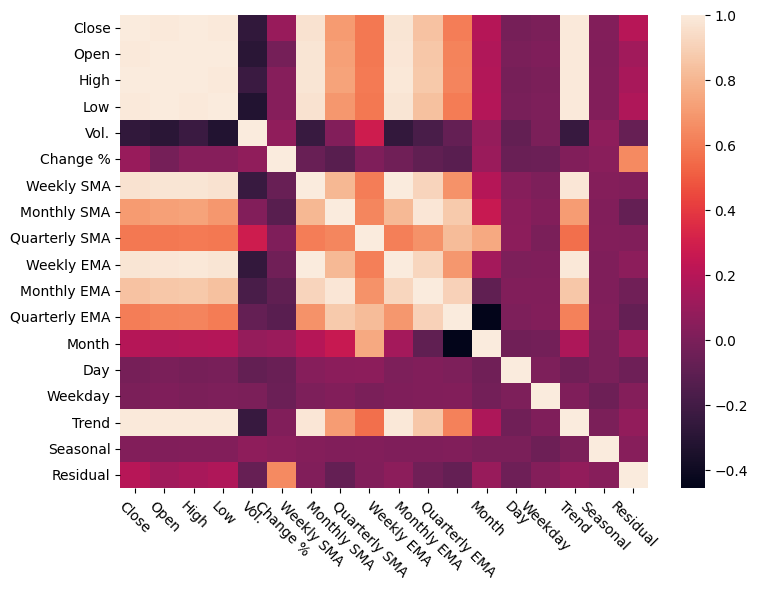

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(normalized_train_df_1.corr())
plt.xticks(rotation = -45)
plt.tight_layout()

In [ ]:
corr_df = normalized_train_df_1.corr()
print('Features with correlation equal to or lower than 0.7:')
print(corr_df[['Close']][corr_df.loc['Close'] <= 0.7])
print('\nFeatures with correlation higher than 0.7:')
print(corr_df[['Close']][corr_df.loc['Close'] > 0.7])

cols_to_keep = list(corr_df['Close'][corr_df.loc['Close'] > 0.7].index)
print('Features to use for training a prediction model:')
cols_to_keep

Features with correlation equal to or lower than 0.7:
                  Close
Vol.          -0.265379
Change %       0.099591
Quarterly SMA  0.589865
Quarterly EMA  0.603654
Month          0.194907
Day           -0.016961
Weekday        0.003600
Seasonal       0.025313
Residual       0.201241

Features with correlation higher than 0.7:
                Close
Close        1.000000
Open         0.989138
High         0.995150
Low          0.993580
Weekly SMA   0.965238
Monthly SMA  0.701028
Weekly EMA   0.976251
Monthly EMA  0.845845
Trend        0.992077
Features to use for training a prediction model:


['Close',
 'Open',
 'High',
 'Low',
 'Weekly SMA',
 'Monthly SMA',
 'Weekly EMA',
 'Monthly EMA',
 'Trend']

In [ ]:
# import matplotlib.pyplot as plt

# train_df_1['Quarterly EMA'].plot(label='Quarterly EMA')
# train_df_1['Quarterly SMA'].plot(label='Quarterly SMA')
# plt.legend();

In [ ]:
# from statsmodels.tsa.api import SimpleExpSmoothing

# es = SimpleExpSmoothing(train_df_1.Close.values)
# es.fit(smoothing_level=0.1)

# plt.plot(train_df_1.Close.values, label='Close')
# plt.plot(es.predict(es.params, start=0, end=None), label='Predicted')
# plt.legend();

### <b>5. Train a model</b>

* for nan values, you could consider discarding them if you have enough data.
Or you could plot the data to see how the nan values can be filled (e.g. average, ffill, bfill, etc.). It could be hard to figure this out, so it such cases, could just drop the nan values becausing imputing can bring bias that might not be helpful to the model/predictions.

In [ ]:
temp_train_df = normalized_train_df_1[cols_to_keep].asfreq('D').ffill().dropna(axis=1)
y_train_1 = temp_train_df.Close
X_train_1 = temp_train_df.drop('Close', axis=1)

temp_test_df = normalized_test_df_1[cols_to_keep].asfreq('D').ffill().dropna(axis=1)
y_test_1 = temp_test_df.Close
X_test_1 = temp_test_df.drop('Close', axis=1)

In [ ]:
# https://medium.datadriveninvestor.com/time-series-prediction-using-sarimax-a6604f258c56
from pmdarima.arima import auto_arima
step_wise=auto_arima(y_train_1, 
                    exogenous= X_train_1,
                    start_p=1, max_p=7, 
                    start_q=1, max_q=7, 
                    d=1, max_d=7,
                    trace=True, 
                    error_action='ignore', 
                    suppress_warnings=True, 
                    stepwise=True)
step_wise.summary()

# https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=820.460, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=756.850, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=818.468, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=727.366, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=713.283, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=709.248, Time=0.11 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=699.857, Time=0.16 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=691.387, Time=0.20 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=692.611, Time=0.14 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(6,1,0)(0,0,0)[0]             : AIC=689.392, Time=0.11 sec
 A

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  230
Model:               SARIMAX(5, 1, 1)   Log Likelihood                -326.790
Date:                Sat, 17 Jun 2023   AIC                            667.580
Time:                        16:55:59   BIC                            691.616
Sample:                             0   HQIC                           677.277
                                - 230                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0446      0.072     -0.624      0.533      -0.185       0.096
ar.L2         -0.0489      0.072     -0.677      0.499      -0.191       0.093
ar.L3         -0.0028      0.068     -0.040      0.968      -0.136       0.131
ar.L4         -0.0051      0.069     -0.074      0.941      -0.140       0.130
ar.L5         -0.0607      0.076     -0.799      0.424      -0.210       0.088
ma.L1         -0.9880      0.020    -48.445      0.000      -1.028      -0.948
sigma2         0.9985      0.532      1.875      0.061      -0.045       2.042
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                34.96
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.04
Prob(H) (two-sided):                  0.93   Kurtosis:                         1.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

                               SARIMAX Results                                
Dep. Variable:             Price Move   No. Observations:                  230
Model:               SARIMAX(5, 1, 1)   Log Likelihood                -350.393
Date:                Sat, 17 Jun 2023   AIC                            750.785
Time:                        16:56:11   BIC                            836.628
Sample:                             0   HQIC                           785.416
                                - 230                                         
Covariance Type:                  opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Close (-1 day)         -0.1594      0.018     -9.014      0.000      -0.194      -0.125
Open (-1 day)           0.0058      0.015      0.382      0.702      -0.024       0.036
High (-1 day)   

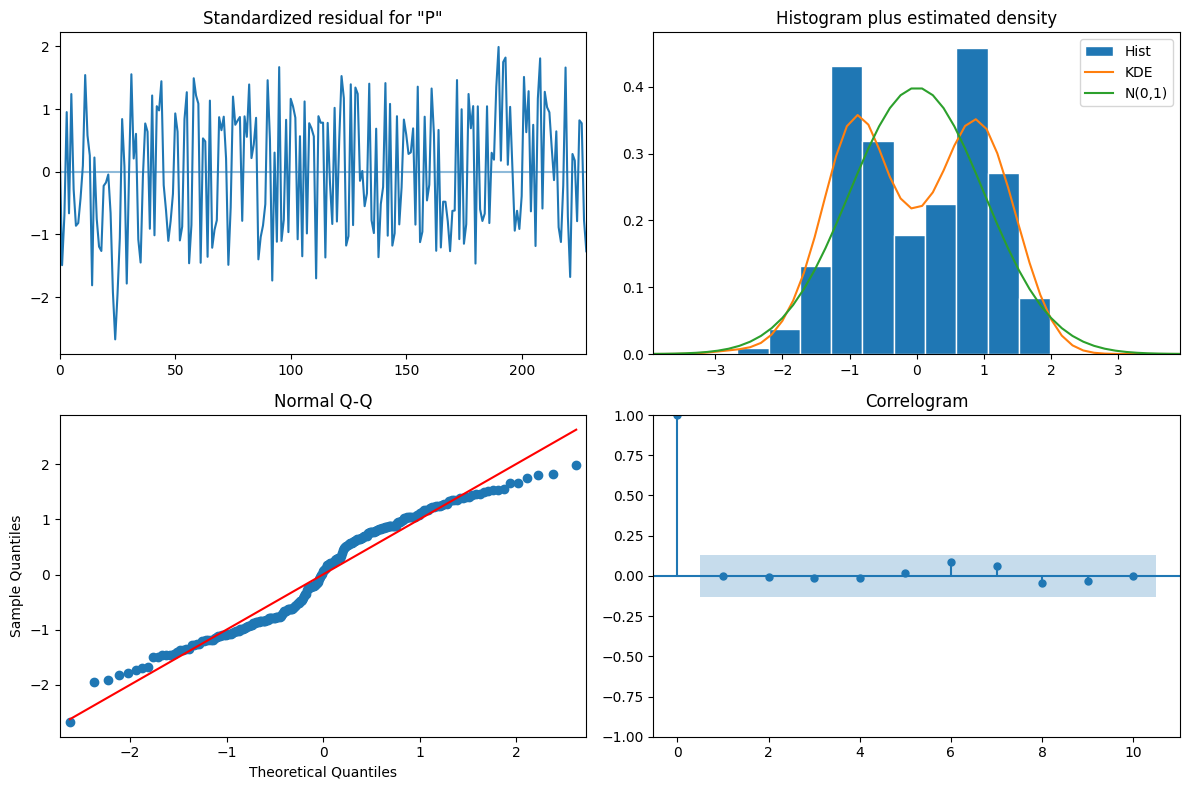

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

sarimax_model = SARIMAX(
    endog = y_train_1,
    exog = X_train_1,
    order=(5,1,1),
    # seasonal_order=(0,1,0,7)
    )
results = sarimax_model.fit(disp=False)
print(results.summary())

results.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

The plot_diagnostics method above produces a 2x2 plot grid with the following plots (ordered clockwise from top left):
1. Standardized residuals over time
2. Histogram plus estimated density of standardized residuals, along with a Normal(0,1) density plotted for reference.
3. Normal Q-Q plot, with Normal reference line.
4. Correlogram

In [ ]:
from datetime import timedelta

pred = results.get_prediction(start=X_train_1.shape[0],
                              end=X_train_1.shape[0] + X_test_1.shape[0] - 1,
                              exog=X_test_1)
pred_ci = pred.conf_int()
pred_mean = pred.predicted_mean

# Push the dates to 4 days later in the predictions since there's no trading data between Dec 31th and Jan 3nd.
# pred_mean.index += timedelta(days=4)
# pred_ci.index += timedelta(days=4)

# ax = y_test_1.plot(label='Observed', figsize=(12, 4))
# pred_mean.plot(ax=ax, label='Predicted', alpha=.7)

# # ax.fill_between(pred_ci.index,
# #                 pred_ci.iloc[:, 0], # lower band/confidence interval
# #                 pred_ci.iloc[:, 1], # upper band/confidence interval
# #                 color='r', alpha=.2)


# mean = y_test_1.mean()
# std = y_test_1.std()

# upper_band = y_test_1 + (std * 1.5)
# lower_band = y_test_1 - (std * 1.5)

# ax.fill_between(y_test_1.index,
#                 lower_band,
#                 upper_band,
#                 color='b', alpha=.2)


# ax.set_xlabel('Date')
# ax.set_ylabel('Close')
# plt.title('Observed and Predicted values on a daily basis')
# plt.legend()
# plt.tight_layout()
# plt.show()

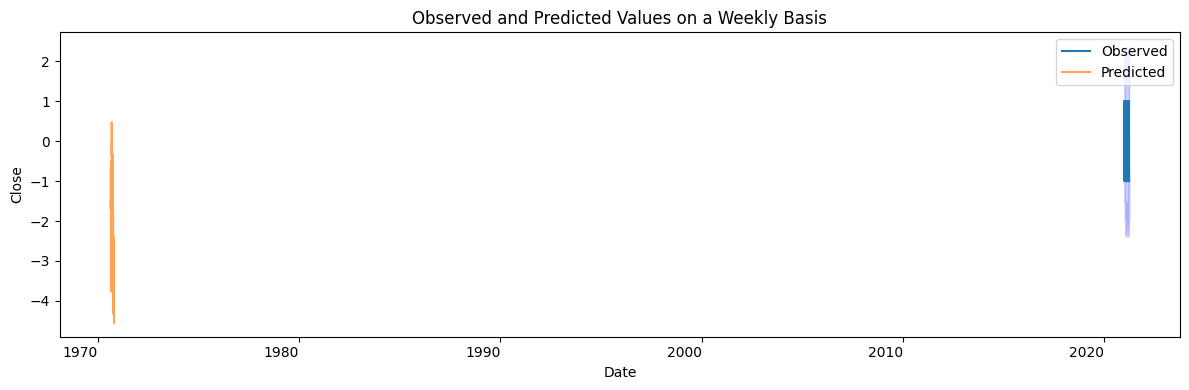

In [ ]:
ax = y_test_1.plot(label='Observed', figsize=(12, 4))
pred_mean.plot(ax=ax, label='Predicted', alpha=.7)

# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0], # lower band/confidence interval
#                 pred_ci.iloc[:, 1], # upper band/confidence interval
#                 color='r', alpha=.2)


time_period = 7
rolling_mean = y_test_1.rolling(window=time_period).mean()
rolling_std = y_test_1.rolling(window=time_period).std()

upper_band = (rolling_mean + (rolling_std * 2)).fillna(method='backfill').rename('Upper Band')
lower_band = (rolling_mean - (rolling_std * 2)).fillna(method='backfill').rename('Lower Band')

ax.fill_between(y_test_1.index,
                lower_band,
                upper_band,
                color='b', alpha=.2)


ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.title('Observed and Predicted Values on a Weekly Basis')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
results_df

,Price Move,Upper Band,Lower Band,Predicted,Trade Decision,No. of Stock,Balance,Capital Return
2021-01-01,-1.0,1.523229,-2.380372,NaN,Hold,10,2000,0
2021-01-02,-1.0,1.523229,-2.380372,NaN,Hold,10,2000,0
2021-01-03,-1.0,1.523229,-2.380372,NaN,Hold,10,2000,0
2021-01-04,1.0,1.523229,-2.380372,NaN,Hold,10,2000,0
2021-01-05,1.0,1.523229,-2.380372,-0.907012,Sell,8,2002,2
...,...,...,...,...,...,...,...,...
2021-03-31,-1.0,2.380372,-1.523229,-3.277997,Buy,-2002,0,-2000
2021-04-01,NaN,NaN,NaN,-3.120225,Hold,-2002,0,-2000
2021-04-02,NaN,NaN,NaN,-3.165064,Hold,-2002,0,-2000
2021-04-03,NaN,NaN,NaN,-3.363983,Hold,-2002,0,-2000


In [ ]:
import pandas as pd

results_df = pd.concat([y_test_1,
                        upper_band,
                        lower_band,
                        pred_mean.rename('Predicted')], axis=1)
results_df['Trade Decision'] = 'Hold'
results_df['No. of Stock'] = 0
results_df['Balance'] = 0

first_index = results_df.index[0]
last_index = results_df.index[-1]

max_no_stock_to_trade = 2
initial_balance = 2000
initial_no_stock = 10
results_df.loc[first_index, 'Balance'] = -initial_balance
results_df.loc[first_index, 'No. of Stock'] = initial_no_stock

for i, row in results_df.iterrows():
    target = row['Price Move']
    upper = row['Upper Band']
    lower = row['Lower Band']
    pred = row['Predicted']
    
    if i == first_index:
        previous_balance = initial_balance
        previous_no_stock = initial_no_stock
    else:
        previous_balance = results_df.loc[previous_index, 'Balance']
        previous_no_stock = results_df.loc[previous_index, 'No. of Stock']

    if (pred < lower) and (i != last_index) and (previous_balance >= target):
        results_df.loc[i, 'Trade Decision'] = 'Buy'
        max_no_stock_to_buy = previous_balance // target
        no_stock_to_buy = min( max_no_stock_to_trade, max_no_stock_to_buy )
        results_df.loc[i, 'Balance'] = previous_balance - (target * no_stock_to_buy)
        results_df.loc[i, 'No. of Stock'] = previous_no_stock + no_stock_to_buy
    elif ((pred > lower) or (i == last_index)) and (previous_no_stock > 0):
        results_df.loc[i, 'Trade Decision'] = 'Sell'        
        no_stock_to_sell = min( max_no_stock_to_trade, previous_no_stock)
        results_df.loc[i, 'Balance'] = previous_balance + (target * no_stock_to_sell)
        results_df.loc[i, 'No. of Stock'] = previous_no_stock - no_stock_to_sell

    if results_df.loc[i, 'Trade Decision'] == 'Hold':
        results_df.loc[i, 'Balance'] = previous_balance
        results_df.loc[i, 'No. of Stock'] = previous_no_stock

    previous_index = i

results_df['Capital Return'] = results_df['Balance'] - initial_balance
results_df.tail()


,Price Move,Upper Band,Lower Band,Predicted,Trade Decision,No. of Stock,Balance,Capital Return
2021-03-31,-1.0,2.380372,-1.523229,-3.277997,Buy,-2002,0,-2000
2021-04-01,NaN,NaN,NaN,-3.120225,Hold,-2002,0,-2000
2021-04-02,NaN,NaN,NaN,-3.165064,Hold,-2002,0,-2000
2021-04-03,NaN,NaN,NaN,-3.363983,Hold,-2002,0,-2000
2021-04-04,NaN,NaN,NaN,-3.416594,Hold,-2002,0,-2000


In [ ]:
results_df.head(60)

,Price Move,Upper Band,Lower Band,Predicted,Trade Decision,No. of Stock,Balance,Capital Return
2021-01-01,-1.0,1.523229,-2.380372,NaN,Hold,10,2000,0
2021-01-02,-1.0,1.523229,-2.380372,NaN,Hold,10,2000,0
2021-01-03,-1.0,1.523229,-2.380372,NaN,Hold,10,2000,0
2021-01-04,1.0,1.523229,-2.380372,NaN,Hold,10,2000,0
2021-01-05,1.0,1.523229,-2.380372,-0.907012,Sell,8,2002,2
2021-01-06,-1.0,1.523229,-2.380372,-0.875832,Sell,6,2000,0
2021-01-07,-1.0,1.523229,-2.380372,-0.799032,Sell,4,1998,-2
2021-01-08,1.0,1.995233,-2.280947,-0.749283,Sell,2,2000,0
2021-01-09,1.0,2.280947,-1.995233,-0.633275,Sell,0,2002,2
2021-01-10,1.0,2.380372,-1.523229,-0.939167,Hold,0,2002,2


if the predicted price is lower than the lowerbound =>  buy
if the predicted price is within the Bollinger band => hold
if the predicted price is higher than the upperbound— => sell

1 train a model and predict on a daily, weekly and monthly basis.

2 calculate threshold/uncertainty (of the prediction) (+ bollinger band of the observed data?)<br>
Typical values used:<br>
Short term: 10 day moving average, bands at 1.5 standard deviations. (1.5 times the standard dev. +/- the SMA)<br>
Medium term: 20 day moving average, bands at 2 standard deviations.<br>
Long term: 50 day moving average, bands at 2.5 standard deviations.<br>
                                                       
3 decide to buy/hold/sell based on the threshold

4 store the value/profit if I had traded based on the decision. (also need to define how many money/stock I already have.)

SARIMAX is a powerful tool for modeling and forecasting time series data, especially when there are known seasonal patterns and the influence of exogenous variables needs to be considered.

In a SARIMAX model, the time series is assumed to have both non-seasonal and seasonal components. The non-seasonal component is captured by the ARIMA model, while the seasonal component is captured by the seasonal ARIMA (SARIMA) model. The inclusion of exogenous variables allows for the incorporation of additional factors that may influence the time series.

The SARIMAX model is typically denoted as SARIMAX(p, d, q)(P, D, Q, s), where:

p, d, and q are the orders of the non-seasonal AR, differencing, and MA components, respectively.
P, D, Q, and s are the orders of the seasonal AR, differencing, MA components, and the seasonal period, respectively.
Exogenous variables can be included in the model by specifying them separately.

The SARIMAX model assumes that the time series is stationary after differencing. It models the relationship between the observations and the lags of the observations (autoregressive terms), the differences between observations (differencing terms), and the errors (moving average terms), both in the non-seasonal and seasonal components.

p is the number of autoregressive terms
d is the number of non-seasonal differences needed for stationarity
q is the number of lagged forecast errors in the prediction equation

ARIMA. it just takes the past values of the stock market.

=> move on to SARIMA. S stands for seasonality.

=> SARIMAX - also takes into account external features (i.e, other features)
SARIMAX stands for ‘Seasonal Auto Regressive Integrated Moving Average with eXogenus factors’

=> primarily they are used for understanding the patterns or features of the time series data but we can use them for predictions.

facebook's PROPHET. easy to understand. conceptually similar to SARIMAX.

Uber's timeseries prediction model.


https://towardsdatascience.com/time-series-forecast-in-python-using-sarimax-and-prophet-c970e6056b5b

20:36:39 - cmdstanpy - INFO - Chain [1] start processing
20:36:39 - cmdstanpy - INFO - Chain [1] done processing
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


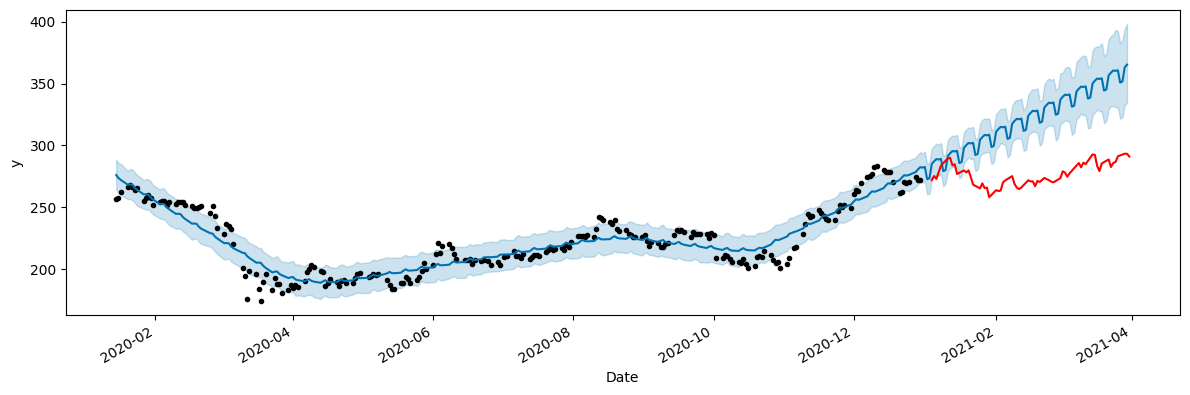

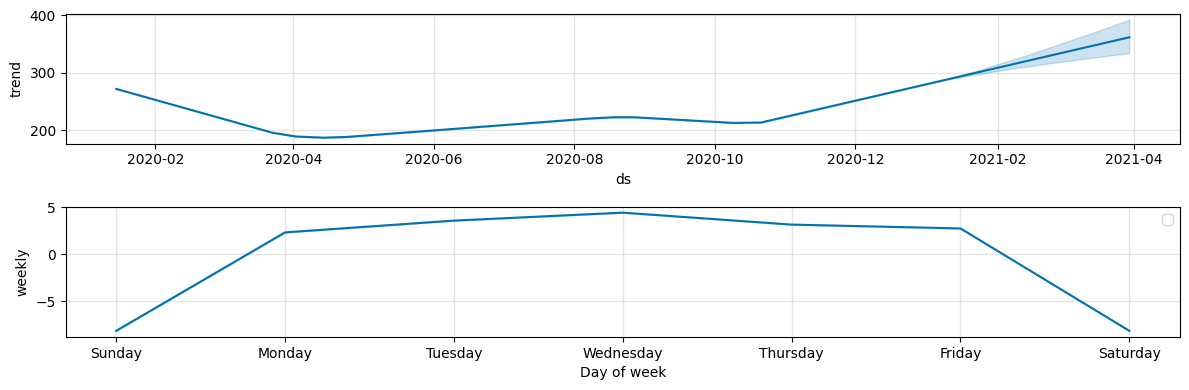

In [91]:
from prophet import Prophet
m = Prophet()
m.fit(pd.concat([X_train, y_train], axis=1).reset_index().rename(columns={'Date': 'ds', 'Price': 'y'}))

# Forecast for the next 3 months
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
# print(forecast.tail())

m.plot(forecast, figsize=(12, 4))
y_test.plot(label='Price', color='red')
m.plot_components(forecast, figsize=(12, 4))
plt.legend();

3. set evaluation metrics
(e.g., Since stock prices prediction is essentially a regression problem,
 the RMSE (Root Mean Squared Error) and MAPE (Mean Absolute Percentage Error %)
 will be our current model evaluation metrics. Both are useful measures of forecast accuracy. )


4. build a prediction model
* When predicting short-term stock prices, it is generally better to focus on more recent data rather than using the data from the entire year. However, it's important to strike a balance between using recent data and having enough historical context. It's recommended to experiment with different time periods and evaluate the performance of your predictions to find the optimal balance.

* LSTM, short for Long Short-term Memory, is an extremely powerful algorithm for time series.
    It can capture historical trend patterns, and predict future values with high accuracy. 
https://towardsdatascience.com/predicting-stock-prices-using-a-keras-lstm-model-4225457f0233
https://www.projectpro.io/article/stock-price-prediction-using-machine-learning-project/571
=> can be difficult/time-consuming to understand. can be tried out after trying simpler models.

* Seasonal autoregressive integrated moving-average with exogenous regressors (SARIMAX)
The most complex variant is the SARIMAX model. It regroups AR, MA, differencing, and seasonal effects.
On top of that, it adds the X: external variables. If you have any variables that could help your model to improve,
you could add them with SARIMAX.

* exponential smoothing
from statsmodels.tsa.api import SimpleExpSmoothing
es = SimpleExpSmoothing(co2_data.co2.values)
es.fit(smoothing_level=0.01)
plt.plot(co2_data.co2.values)
plt.plot(es.predict(es.params, start=0, end=None))
plt.show()
=> takes in only 1 column

* Reinforcement learning
https://www.analyticsvidhya.com/blog/2020/10/reinforcement-learning-stock-price-prediction/


5. evaluate model performance
=> create bollinger bands using the prediced price and recommend buy, hold, or sell decisions?


6. based on the final model prediction, recommend BUY, HOLD, SELL decisions for each stock.
(Maximize capital returns, minimize losses. Ideally a loss should never happen. Minimize HOLD period.)


7. evaluate on the basis of capital returns (based on the trading decisions).
how to quantify or calculate the returns when we don't know how many stocks we had and when we bought them?


8. use bollinger bands to measure the system/model's effectiveness??

Candlestick charts are used by traders to determine possible price movement based on past patterns. Candlesticks are useful when trading as they show four price points (open, close, high, and low) throughout the period of time the trader specifies.

In [ ]:
# import plotly.graph_objects as go

# fig = go.Figure(data=[
#     go.Candlestick(
#     x=train_df_1.index,
#     open=train_df_1['Open'],
#     high=train_df_1['High'],
#     low=train_df_1['Low'],
#     close=train_df_1['Close']
#     )
#     ])

# # fig.update_layout(
# #     margin=dict(l=30, r=30, t=10, b=10),
# #     # paper_bgcolor='LightSteelBlue',
# # )

# fig.update_layout(
#     title=f'{stock_name_1}: Daily OHLC', 
#     yaxis_title='Price (USD)',
#     width=900,
#     height=600)

# fig.show()

In [ ]:
# # Candlestick Chart and Volume Separately
# # Source: https://medium.com/codex/creating-candlestick-charts-using-python-plotly-8081c4820351

# from plotly.subplots import make_subplots

# # figure with secondary y-axis
# fig = make_subplots(specs=[[{'secondary_y': True}]])

# # candlestick
# fig.add_trace(
#     go.Candlestick(
#         x=train_df_1.index,
#         open=train_df_1.Open,
#         high=train_df_1.High,
#         low=train_df_1.Low,
#         close=train_df_1.Close,
#         showlegend=False),
#     row=1,
#     col=1,
#     secondary_y=True
# )

# # volume
# fig.add_trace(
#     go.Bar(x=train_df_1.index,
#            y=train_df_1['Vol.'],
#            showlegend=False,
#            marker={
#                'color': 'grey',
#            }),
#     secondary_y=False,
# )

# fig.update_layout(title=f'{stock_name_1}: Daily OHLCV',
#                   yaxis_title='Price (USD)',
#                   width=900,
#                   height=600)

# fig.show()

if the target is short-term decision, 

bullish patterns -> price likely to rise => buy
bearish patterns -> price likely to fall => sell

If a candlestick pattern doesn’t indicate a change in market direction, it is what is known as a continuation pattern. These can help traders to identify a period of rest in the market, when there is market indecision or neutral price movement. => hold

https://neptune.ai/blog/predicting-stock-prices-using-machine-learning

https://www.simplilearn.com/tutorials/machine-learning-tutorial/stock-price-prediction-using-machine-learning

2. Create Bollinger Bands for 2020 for each company

Typical values used:

Short term: 10 day moving average, bands at 1.5 standard deviations. (1.5 times the standard dev. +/- the SMA)

Medium term: 20 day moving average, bands at 2 standard deviations.

Long term: 50 day moving average, bands at 2.5 standard deviations.

From Semih:

Typically bollinger bands are used to make buy and sell decisions if the predicted price is lower than the lowerbound—> buy if the predicted price is higher than the upperbound—> sell

My interpretation is (the way I would approach) we can use bollinger bands to label the data. Afterwards a classifier or a recommendation system could be developed to predict buy and sell decisions. Based on the recommended actions a loss or profit could be calculated. I don’t think there is only one approach but this is how I would approach it.

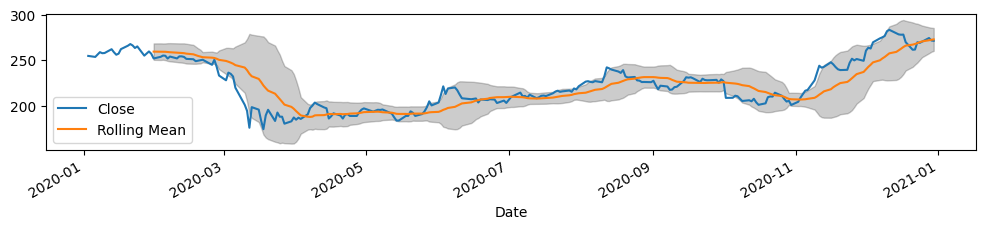

In [ ]:
import matplotlib.pyplot as plt

# Define time period and calculate rolling mean and standard deviation
time_period = 20
rolling_mean = train_df_1['Close'].rolling(window=time_period).mean()
rolling_std = train_df_1['Close'].rolling(window=time_period).std()

# Calculate upper and lower Bollinger Bands
upper_band = rolling_mean + (rolling_std * 2)
lower_band = rolling_mean - (rolling_std * 2)

# Plot the data and the Bollinger Bands
ax = train_df_1['Close'].plot(label='Close')
plt.plot(rolling_mean, label='Rolling Mean')
ax.fill_between(
    rolling_mean.index,
    upper_band,
    lower_band,
    color='k', alpha=.2
)
# plt.plot(upper_band, label='Upper Bollinger Band')
# plt.plot(lower_band, label='Lower Bollinger Band')
plt.legend()
plt.show()